In [3]:
import pandas as pd
import json
import os
import re

In [5]:
pickle_files = ["./data/gpt-4o-detailed_1.pkl", "./data/gemini-1.5-pro-detailed_1.pkl"]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "How many times do the blue and red line plots cross each other?"


pickle_files = ["./data/gpt-4o-detailed_2.pkl", "./data/gemini-1.5-pro-detailed_2.pkl"]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "How many times do the blue and red lines intersect?"

In [6]:
df = pd.concat([df1, df2])

In [7]:
df

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,How many times do the blue and red line plots ...
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,How many times do the blue and red lines inter...


In [8]:
df.groupby(["Model", "prompt"]).count()

image_path  \
Model          prompt                                                           
Gemini-1.5-Pro How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
gpt-4o         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   

                                                                   num_points  \
Model          prompt                                                           
Gemini-1.5-Pro How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   
gpt-4o         How many times do the blue and red line plots c...         150   
               How many times do the blue and red lines inters...         150   

                                                                   num_intersections  \
Model          prompt                                                                  
Gemini-1.5-Pro How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   
gpt-4o         How many times do the blue and red line plots c...                150   
               How many times do the blue and red lines inters...                150   

                                                                   line_colors  \
Model          prompt                                                            
Gemini-1.5-Pro How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   
gpt-4o         How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   

                                                                   line_thickness  \
Model          prompt                                                               
Gemini-1.5-Pro How many times do the blue and red line plots c...             150   
               How many times do the blue and red lines inters...             150   
gpt-4o         How many times do the blue and red line plots c...             150   
               How many times do the blue and red lines inters...             150   

                                                                   coordinates  \
Model          prompt                                                            
Gemini-1.5-Pro How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   
gpt-4o         How many times do the blue and red line plots c...          150   
               How many times do the blue and red lines inters...          150   

                                                                   model_output_raw  \
Model          prompt                                                                 
Gemini-1.5-Pro How many times do the blue and red line plots c...               150   
               How many times do the blue and red lines inters...               150   
gpt-4o         How many times do the blue and red line plots c...               150   
               How many times do the blue and red lines inters...               150   

                                                                   extracted_number  \
Model          prompt                                                                 
Gemini-1.5-Pro How many times do the blue and red line plots c...               150   
               How many times do the blue and red lines inters...               150   
gpt-4o         How many times do the blue and red line plots c...               150   
               How many times do the blue and red lines inters...               150   

                     

In [9]:
# Filter the dataframe for the specific prompt
df_prompt2 = df[df["prompt"] == "How many times do the blue and red lines intersect?"]

# Get all unique image_path values
all_images = set(df_prompt2["image_path"])

# Get image_path values for gpt-4o
gpt4o_images = set(df_prompt2[df_prompt2["Model"] == "gpt-4o"]["image_path"])

# Find the missing image
missing_image = all_images - gpt4o_images

if missing_image:
    print(f"The missing image for gpt-4o is: {missing_image.pop()}")
else:
    print("No missing image found.")

No missing image found.


In [10]:
accuracy_per_model_and_word = df.groupby(["Model"])["is_correct"].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

accuracy_per_model_and_word.T.reset_index()

,Model,is_correct
0,Gemini-1.5-Pro,70.33
1,gpt-4o,48.67


In [11]:
# ... existing code ...


# Function to extract coordinates
def extract_coordinates(coord_dict, line_name, point_index):
    return (
        coord_dict[line_name][point_index]
        if coord_dict and line_name in coord_dict
        else [None, None]
    )


# Expand the coordinates
for line in ["line1", "line2"]:
    for i in range(3):  # Assuming always 3 points per line
        df[f"{line}_x{i+1}"] = df["coordinates"].apply(
            lambda x: extract_coordinates(x, line, i)[0]
        )
        df[f"{line}_y{i+1}"] = df["coordinates"].apply(
            lambda x: extract_coordinates(x, line, i)[1]
        )

# Drop the original 'coordinates' column if you no longer need it
# df = df.drop('coordinates', axis=1)

# Display the updated DataFrame
df

# ... existing code ...

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,...,line1_x2,line1_y2,line1_x3,line1_y3,line2_x1,line2_y1,line2_x2,line2_y2,line2_x3,line2_y3
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,7.990233,10.0,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,7.990233,10.0,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,5.0,2.366107,10.0,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,5.0,2.366107,10.0,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,...,5.0,9.765808,10.0,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,5.0,9.765808,10.0,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160


In [12]:
# ... existing code ...

import numpy as np


# Function to calculate Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


# Calculate distances between corresponding points
for i in range(1, 4):  # For each of the 3 point pairs
    df[f"distance_point{i}"] = euclidean_distance(
        df[f"line1_x{i}"], df[f"line1_y{i}"], df[f"line2_x{i}"], df[f"line2_y{i}"]
    )

# Display the updated DataFrame
df

# ... existing code ...

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,...,line1_y3,line2_x1,line2_y1,line2_x2,line2_y2,line2_x3,line2_y3,distance_point1,distance_point2,distance_point3
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627,1.695002,4.184016,0.022757
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627,1.695002,4.184016,0.022757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924,2.518126,6.808268,0.140852
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924,2.518126,6.808268,0.140852
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **once**. \n,1,False,Gemini-1.5-Pro,...,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160,1.117522,8.942296,3.628507
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect **twice**. \n,2,True,Gemini-1.5-Pro,...,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160,1.117522,8.942296,3.628507


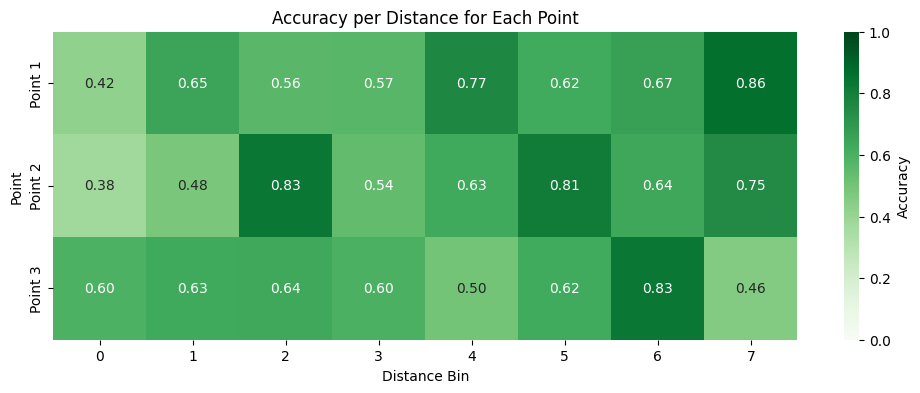

                0         1         2         3         4       5         6  \
Point 1  0.423611  0.650000  0.562500  0.569444  0.766667  0.6250  0.666667   
Point 2  0.375000  0.481481  0.833333  0.541667  0.630952  0.8125  0.638889   
Point 3  0.595238  0.630952  0.636364  0.600000  0.500000  0.6250  0.833333   

                7  
Point 1  0.861111  
Point 2  0.750000  
Point 3  0.458333  


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )

# Calculate accuracy for each bin and point
accuracy_data = []
for i in range(1, 4):
    point_accuracy = df.groupby(f"distance_point{i}_bin")["is_correct"].mean()
    accuracy_data.append(point_accuracy)

# Create a DataFrame from the accuracy data
accuracy_df = pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])

# Create the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    accuracy_df,
    annot=True,
    cmap="Greens",
    fmt=".2f",
    cbar_kws={"label": "Accuracy"},
    vmin=0,
    vmax=1,
)
plt.title("Accuracy per Distance for Each Point")
plt.xlabel("Distance Bin")
plt.ylabel("Point")
plt.show()

# Display the accuracy DataFrame
print(accuracy_df)

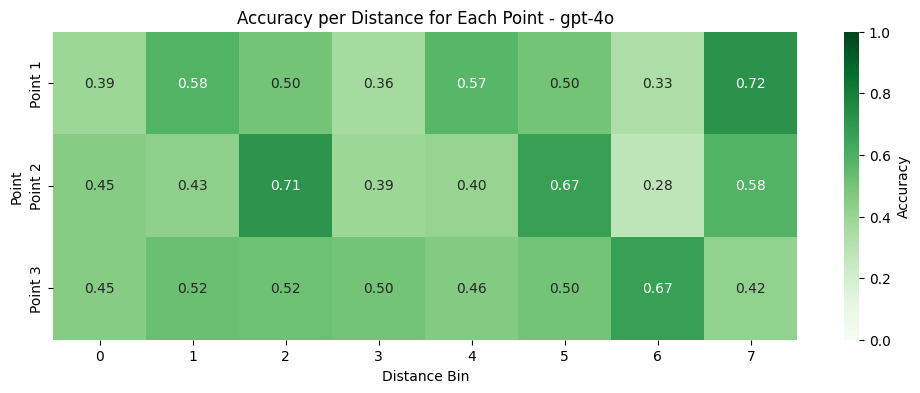


Accuracy DataFrame for gpt-4o:
                0         1         2         3         4         5         6  \
Point 1  0.388889  0.583333  0.500000  0.361111  0.566667  0.500000  0.333333   
Point 2  0.450000  0.425926  0.714286  0.388889  0.404762  0.666667  0.277778   
Point 3  0.452381  0.523810  0.515152  0.500000  0.458333  0.500000  0.666667   

                7  
Point 1  0.722222  
Point 2  0.583333  
Point 3  0.416667  




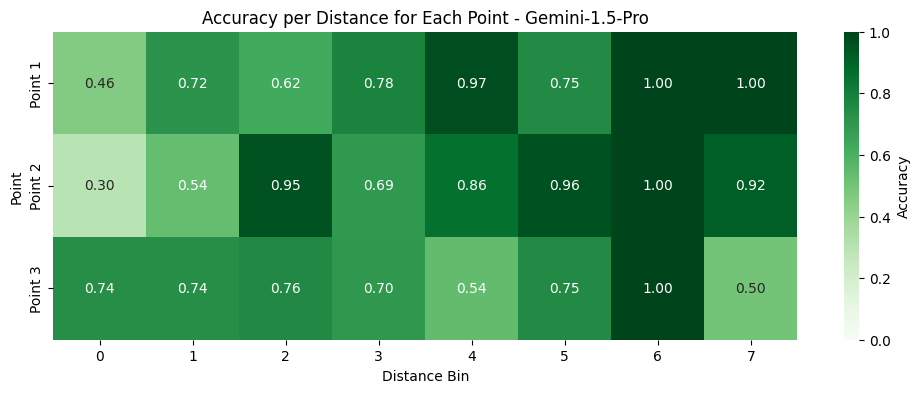


Accuracy DataFrame for Gemini-1.5-Pro:
                0         1         2         3         4         5    6  \
Point 1  0.458333  0.716667  0.625000  0.777778  0.966667  0.750000  1.0   
Point 2  0.300000  0.537037  0.952381  0.694444  0.857143  0.958333  1.0   
Point 3  0.738095  0.738095  0.757576  0.700000  0.541667  0.750000  1.0   

                7  
Point 1  1.000000  
Point 2  0.916667  
Point 3  0.500000  




In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap
def create_heatmap(data, title):
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )
    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.show()


# Get unique models
models = df["Model"].unique()

# Create heatmap for each model
for model in models:
    model_df = df[df["Model"] == model]

    accuracy_data = []
    for i in range(1, 4):
        point_accuracy = model_df.groupby(f"distance_point{i}_bin")["is_correct"].mean()
        accuracy_data.append(point_accuracy)

    accuracy_df = pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])

    create_heatmap(accuracy_df, f"Accuracy per Distance for Each Point - {model}")

    print(f"\nAccuracy DataFrame for {model}:")
    print(accuracy_df)
    print("\n" + "=" * 50 + "\n")

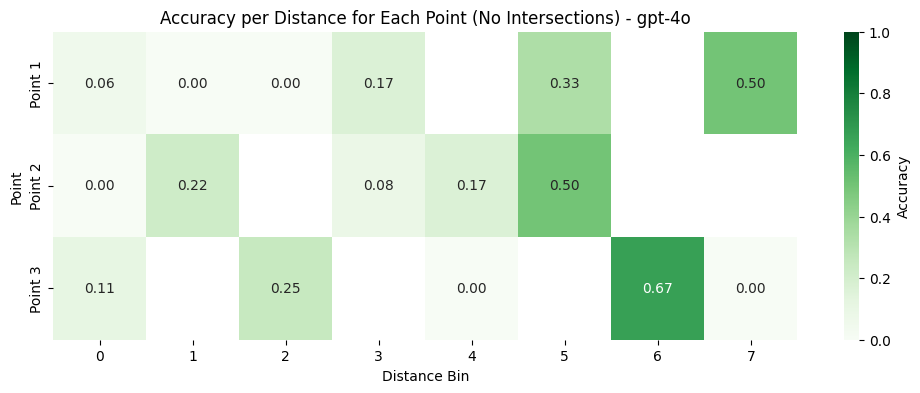

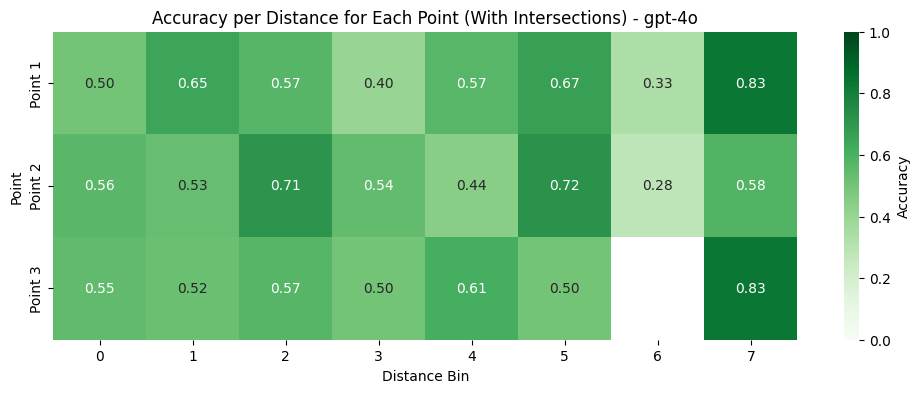


Accuracy for No Intersections - gpt-4o:
                0         1     2         3         4         5         6    7
Point 1  0.055556  0.000000  0.00  0.166667       NaN  0.333333       NaN  0.5
Point 2  0.000000  0.222222   NaN  0.083333  0.166667  0.500000       NaN  NaN
Point 3  0.111111       NaN  0.25       NaN  0.000000       NaN  0.666667  0.0

Accuracy for Intersections - gpt-4o:
                0         1         2         3         4         5         6  \
Point 1  0.500000  0.648148  0.571429  0.400000  0.566667  0.666667  0.333333   
Point 2  0.562500  0.527778  0.714286  0.541667  0.444444  0.722222  0.277778   
Point 3  0.545455  0.523810  0.574074  0.500000  0.611111  0.500000       NaN   

                7  
Point 1  0.833333  
Point 2  0.583333  
Point 3  0.833333  




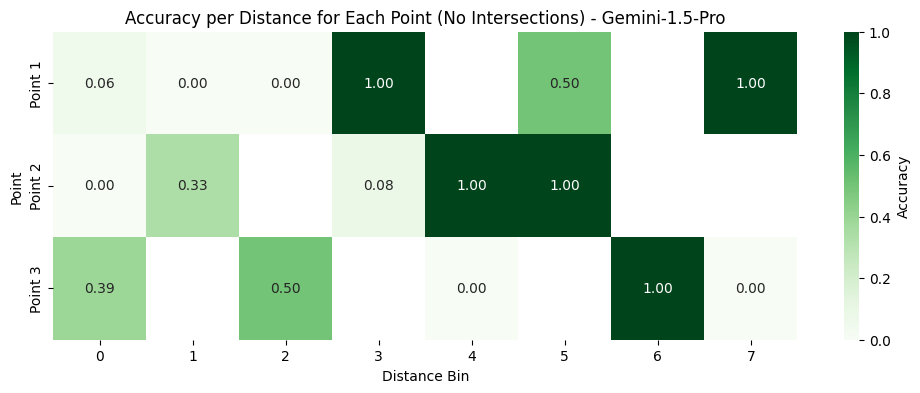

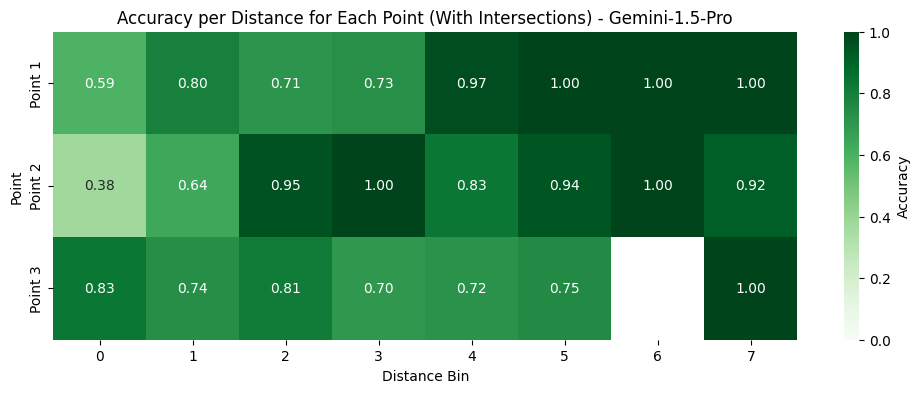


Accuracy for No Intersections - Gemini-1.5-Pro:
                0         1    2         3    4    5    6    7
Point 1  0.055556  0.000000  0.0  1.000000  NaN  0.5  NaN  1.0
Point 2  0.000000  0.333333  NaN  0.083333  1.0  1.0  NaN  NaN
Point 3  0.388889       NaN  0.5       NaN  0.0  NaN  1.0  0.0

Accuracy for Intersections - Gemini-1.5-Pro:
                0         1         2         3         4         5    6  \
Point 1  0.592593  0.796296  0.714286  0.733333  0.966667  1.000000  1.0   
Point 2  0.375000  0.638889  0.952381  1.000000  0.833333  0.944444  1.0   
Point 3  0.833333  0.738095  0.814815  0.700000  0.722222  0.750000  NaN   

                7  
Point 1  1.000000  
Point 2  0.916667  
Point 3  1.000000  




In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap
def create_heatmap(data, title):
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )
    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.show()


# Function to calculate accuracy for each bin and point
def calculate_accuracy(data):
    accuracy_data = []
    for i in range(1, 4):
        point_accuracy = data.groupby(f"distance_point{i}_bin")["is_correct"].mean()
        accuracy_data.append(point_accuracy)
    return pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])


# Get unique models
models = df["Model"].unique()

# Create heatmaps for each model
for model in models:
    model_df = df[df["Model"] == model]

    # No intersections
    no_intersections = model_df[model_df["num_intersections"] == 0]
    accuracy_df_no_int = calculate_accuracy(no_intersections)
    create_heatmap(
        accuracy_df_no_int,
        f"Accuracy per Distance for Each Point (No Intersections) - {model}",
    )

    # With intersections
    intersections = model_df[model_df["num_intersections"] > 0]
    accuracy_df_int = calculate_accuracy(intersections)
    create_heatmap(
        accuracy_df_int,
        f"Accuracy per Distance for Each Point (With Intersections) - {model}",
    )

    print(f"\nAccuracy for No Intersections - {model}:")
    print(accuracy_df_no_int)
    print(f"\nAccuracy for Intersections - {model}:")
    print(accuracy_df_int)
    print("\n" + "=" * 50 + "\n")

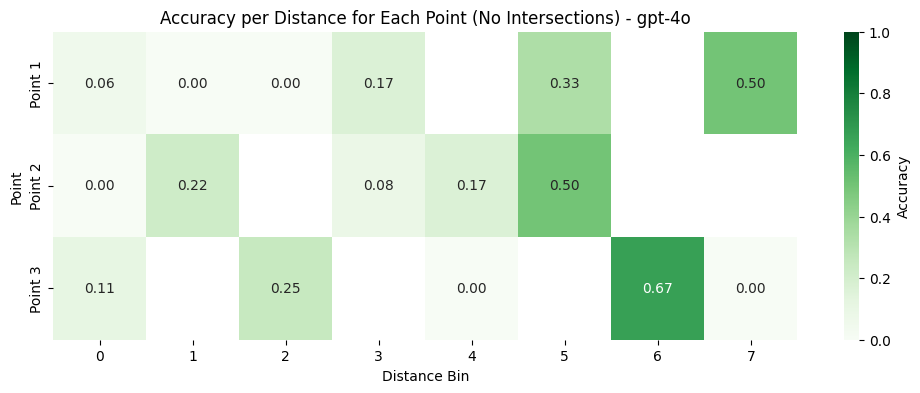

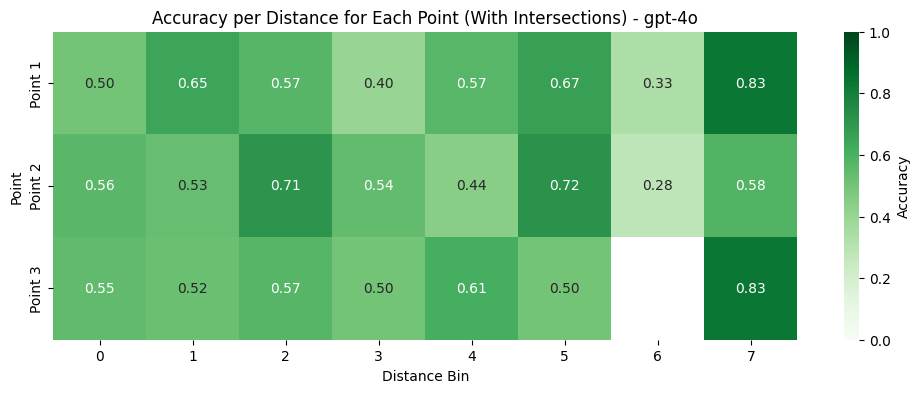


Accuracy for No Intersections - gpt-4o:
                0         1     2         3         4         5         6    7
Point 1  0.055556  0.000000  0.00  0.166667       NaN  0.333333       NaN  0.5
Point 2  0.000000  0.222222   NaN  0.083333  0.166667  0.500000       NaN  NaN
Point 3  0.111111       NaN  0.25       NaN  0.000000       NaN  0.666667  0.0

Accuracy for Intersections - gpt-4o:
                0         1         2         3         4         5         6  \
Point 1  0.500000  0.648148  0.571429  0.400000  0.566667  0.666667  0.333333   
Point 2  0.562500  0.527778  0.714286  0.541667  0.444444  0.722222  0.277778   
Point 3  0.545455  0.523810  0.574074  0.500000  0.611111  0.500000       NaN   

                7  
Point 1  0.833333  
Point 2  0.583333  
Point 3  0.833333  




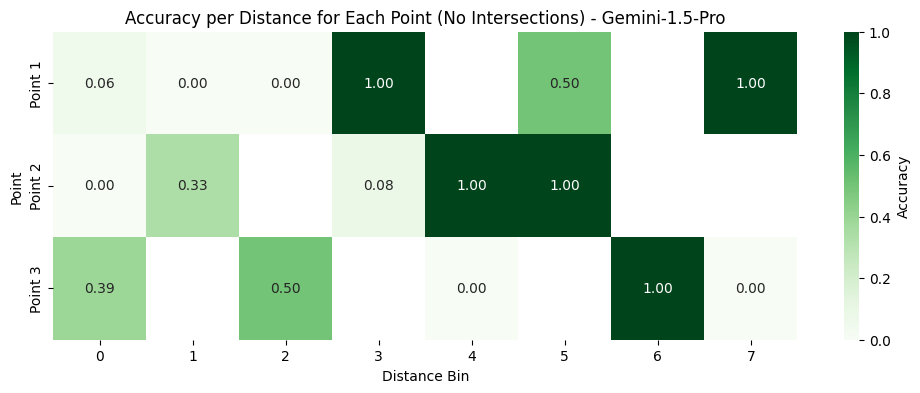

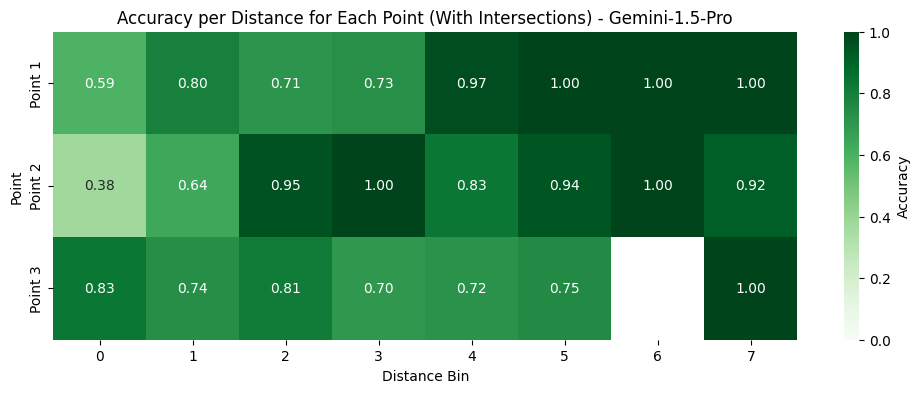


Accuracy for No Intersections - Gemini-1.5-Pro:
                0         1    2         3    4    5    6    7
Point 1  0.055556  0.000000  0.0  1.000000  NaN  0.5  NaN  1.0
Point 2  0.000000  0.333333  NaN  0.083333  1.0  1.0  NaN  NaN
Point 3  0.388889       NaN  0.5       NaN  0.0  NaN  1.0  0.0

Accuracy for Intersections - Gemini-1.5-Pro:
                0         1         2         3         4         5    6  \
Point 1  0.592593  0.796296  0.714286  0.733333  0.966667  1.000000  1.0   
Point 2  0.375000  0.638889  0.952381  1.000000  0.833333  0.944444  1.0   
Point 3  0.833333  0.738095  0.814815  0.700000  0.722222  0.750000  NaN   

                7  
Point 1  1.000000  
Point 2  0.916667  
Point 3  1.000000  




In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap
def create_heatmap(data, title):
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )
    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.show()


# Function to calculate accuracy for each bin and point
def calculate_accuracy(data):
    accuracy_data = []
    for i in range(1, 4):
        point_accuracy = data.groupby(f"distance_point{i}_bin")["is_correct"].mean()
        accuracy_data.append(point_accuracy)
    return pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])


# Get unique models
models = df["Model"].unique()

# Create heatmaps for each model
for model in models:
    model_df = df[df["Model"] == model]

    # No intersections
    no_intersections = model_df[model_df["num_intersections"] == 0]
    accuracy_df_no_int = calculate_accuracy(no_intersections)
    create_heatmap(
        accuracy_df_no_int,
        f"Accuracy per Distance for Each Point (No Intersections) - {model}",
    )

    # With intersections
    intersections = model_df[model_df["num_intersections"] > 0]
    accuracy_df_int = calculate_accuracy(intersections)
    create_heatmap(
        accuracy_df_int,
        f"Accuracy per Distance for Each Point (With Intersections) - {model}",
    )

    print(f"\nAccuracy for No Intersections - {model}:")
    print(accuracy_df_no_int)
    print(f"\nAccuracy for Intersections - {model}:")
    print(accuracy_df_int)
    print("\n" + "=" * 50 + "\n")

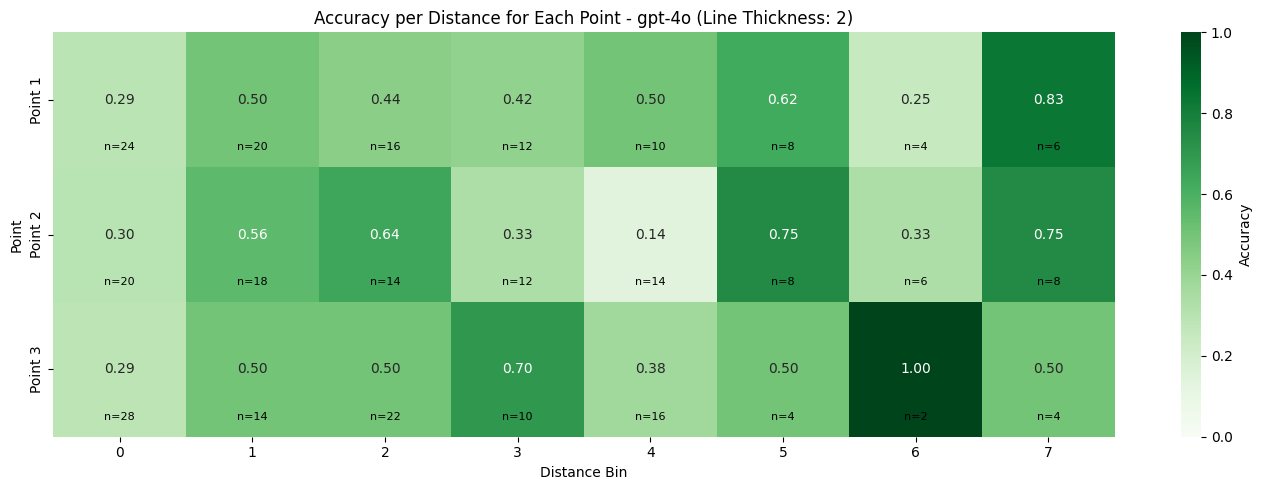


Accuracy for gpt-4o, Line Thickness 2:
                0         1         2         3         4      5         6  \
Point 1  0.291667  0.500000  0.437500  0.416667  0.500000  0.625  0.250000   
Point 2  0.300000  0.555556  0.642857  0.333333  0.142857  0.750  0.333333   
Point 3  0.285714  0.500000  0.500000  0.700000  0.375000  0.500  1.000000   

                7  
Point 1  0.833333  
Point 2  0.750000  
Point 3  0.500000  

Sample Counts for gpt-4o, Line Thickness 2:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




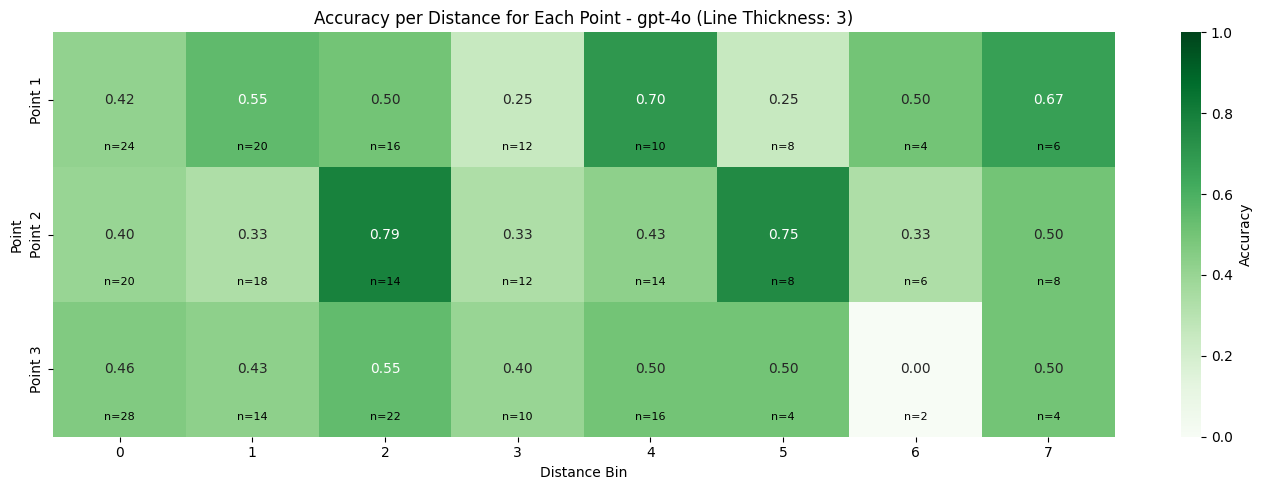


Accuracy for gpt-4o, Line Thickness 3:
                0         1         2         3         4     5         6  \
Point 1  0.416667  0.550000  0.500000  0.250000  0.700000  0.25  0.500000   
Point 2  0.400000  0.333333  0.785714  0.333333  0.428571  0.75  0.333333   
Point 3  0.464286  0.428571  0.545455  0.400000  0.500000  0.50  0.000000   

                7  
Point 1  0.666667  
Point 2  0.500000  
Point 3  0.500000  

Sample Counts for gpt-4o, Line Thickness 3:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




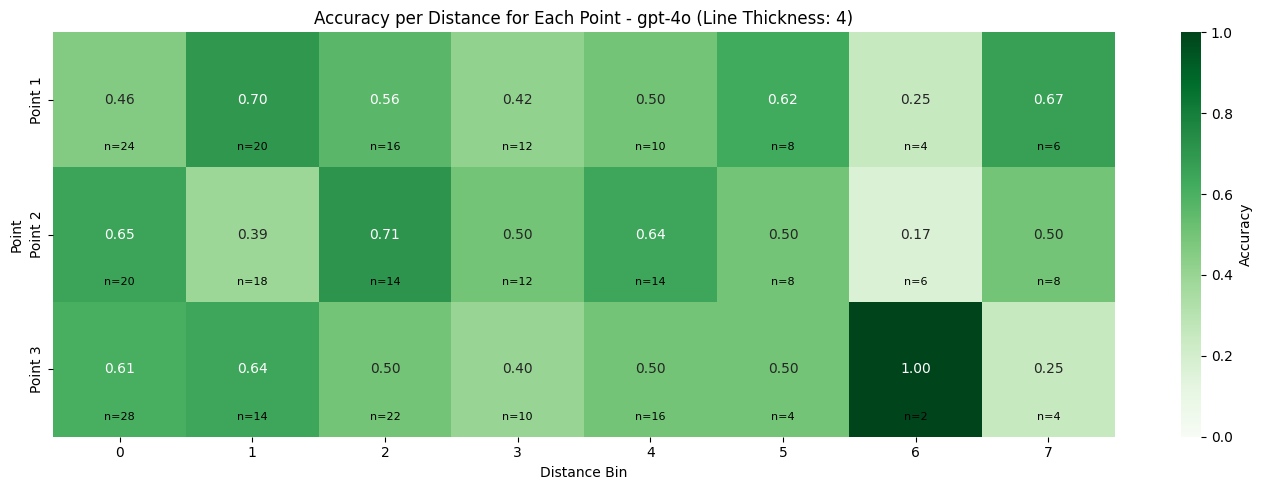


Accuracy for gpt-4o, Line Thickness 4:
                0         1         2         3         4      5         6  \
Point 1  0.458333  0.700000  0.562500  0.416667  0.500000  0.625  0.250000   
Point 2  0.650000  0.388889  0.714286  0.500000  0.642857  0.500  0.166667   
Point 3  0.607143  0.642857  0.500000  0.400000  0.500000  0.500  1.000000   

                7  
Point 1  0.666667  
Point 2  0.500000  
Point 3  0.250000  

Sample Counts for gpt-4o, Line Thickness 4:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




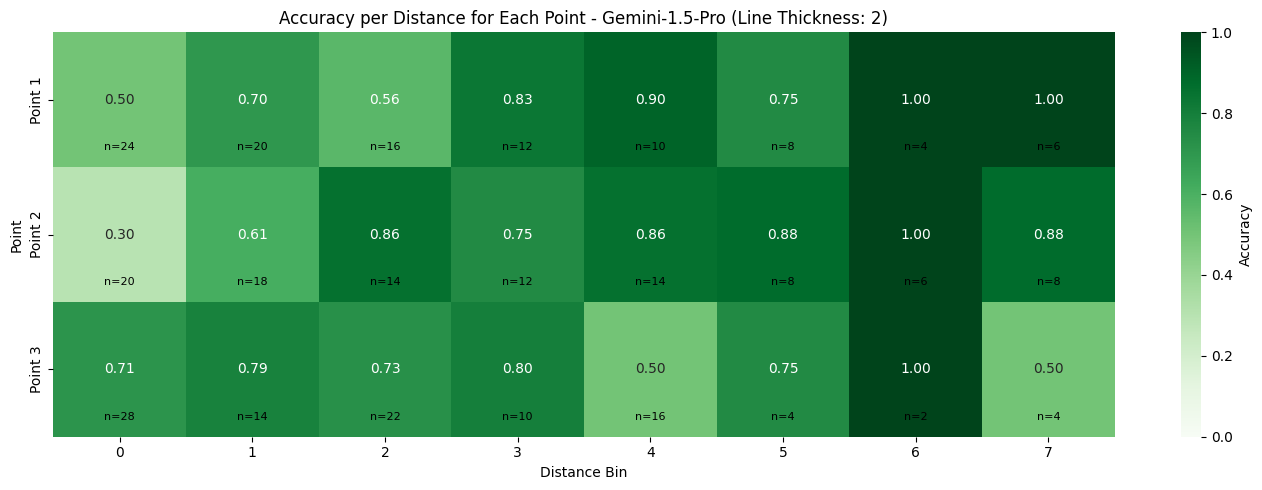


Accuracy for Gemini-1.5-Pro, Line Thickness 2:
                0         1         2         3         4      5    6      7
Point 1  0.500000  0.700000  0.562500  0.833333  0.900000  0.750  1.0  1.000
Point 2  0.300000  0.611111  0.857143  0.750000  0.857143  0.875  1.0  0.875
Point 3  0.714286  0.785714  0.727273  0.800000  0.500000  0.750  1.0  0.500

Sample Counts for Gemini-1.5-Pro, Line Thickness 2:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




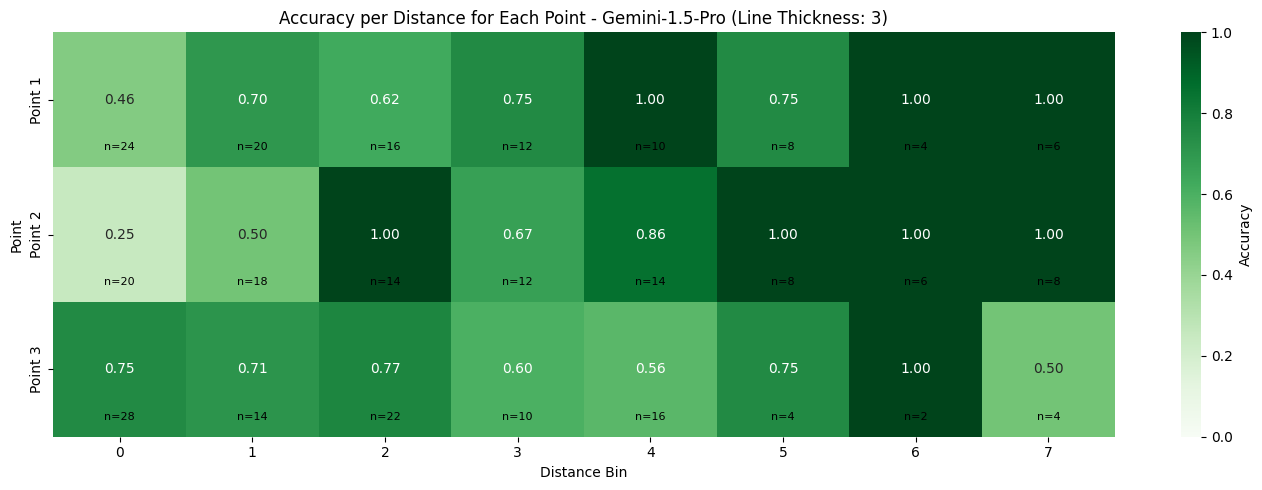


Accuracy for Gemini-1.5-Pro, Line Thickness 3:
                0         1         2         3         4     5    6    7
Point 1  0.458333  0.700000  0.625000  0.750000  1.000000  0.75  1.0  1.0
Point 2  0.250000  0.500000  1.000000  0.666667  0.857143  1.00  1.0  1.0
Point 3  0.750000  0.714286  0.772727  0.600000  0.562500  0.75  1.0  0.5

Sample Counts for Gemini-1.5-Pro, Line Thickness 3:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




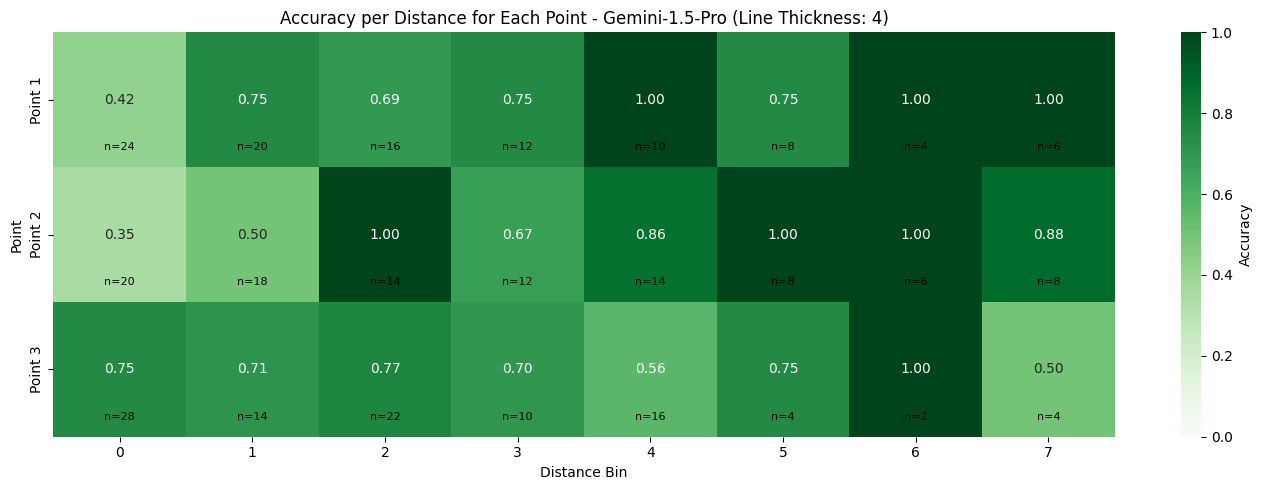


Accuracy for Gemini-1.5-Pro, Line Thickness 4:
                0         1         2         3         4     5    6      7
Point 1  0.416667  0.750000  0.687500  0.750000  1.000000  0.75  1.0  1.000
Point 2  0.350000  0.500000  1.000000  0.666667  0.857143  1.00  1.0  0.875
Point 3  0.750000  0.714286  0.772727  0.700000  0.562500  0.75  1.0  0.500

Sample Counts for Gemini-1.5-Pro, Line Thickness 4:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap with sample counts
def create_heatmap(data, count_data, title):
    plt.figure(figsize=(14, 5))
    ax = sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )

    # Add sample counts below accuracy values
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not np.isnan(data.iloc[i, j]):
                ax.text(
                    j + 0.5,
                    i + 0.85,
                    f"n={count_data.iloc[i, j]}",
                    ha="center",
                    va="center",
                    fontsize=8,
                )

    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.tight_layout()
    plt.show()


# Function to calculate accuracy and sample counts
def calculate_accuracy_and_counts(data):
    accuracy_data = []
    count_data = []
    for i in range(1, 4):
        point_accuracy = data.groupby(f"distance_point{i}_bin")["is_correct"].mean()
        point_count = data.groupby(f"distance_point{i}_bin").size()
        accuracy_data.append(point_accuracy)
        count_data.append(point_count)

    accuracy_df = pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])
    count_df = pd.DataFrame(count_data, index=["Point 1", "Point 2", "Point 3"])
    return accuracy_df, count_df


# Get unique models
models = df["Model"].unique()

# Calculate and create heatmaps for each model and line thickness
for model in models:
    model_data = df[df["Model"] == model]

    for thickness in [2, 3, 4]:
        thickness_data = model_data[model_data["line_thickness"] == thickness]
        accuracy_df, count_df = calculate_accuracy_and_counts(thickness_data)

        create_heatmap(
            accuracy_df,
            count_df,
            f"Accuracy per Distance for Each Point - {model} (Line Thickness: {thickness})",
        )

        print(f"\nAccuracy for {model}, Line Thickness {thickness}:")
        print(accuracy_df)
        print(f"\nSample Counts for {model}, Line Thickness {thickness}:")
        print(count_df)
        print("\n" + "=" * 50 + "\n")


Analysis for gpt-4o



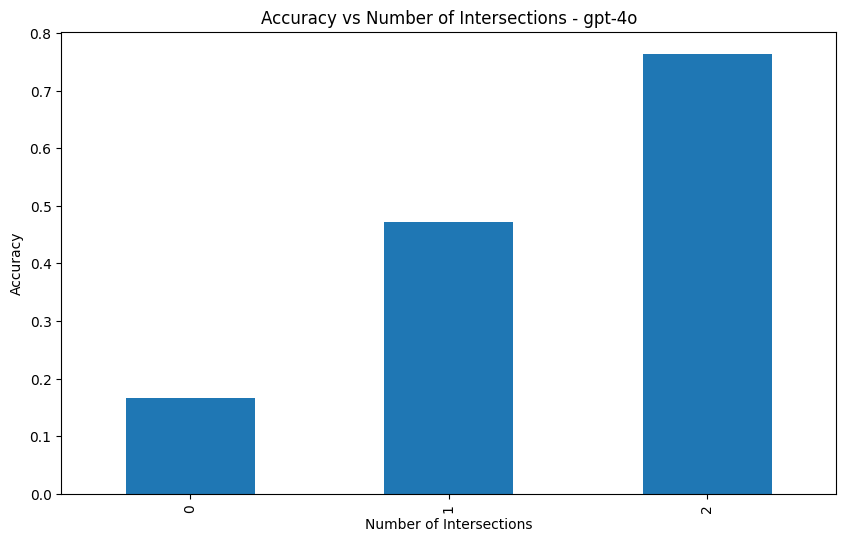

Accuracy by number of intersections:
num_intersections
0    0.166667
1    0.471264
2    0.763889
Name: is_correct, dtype: float64




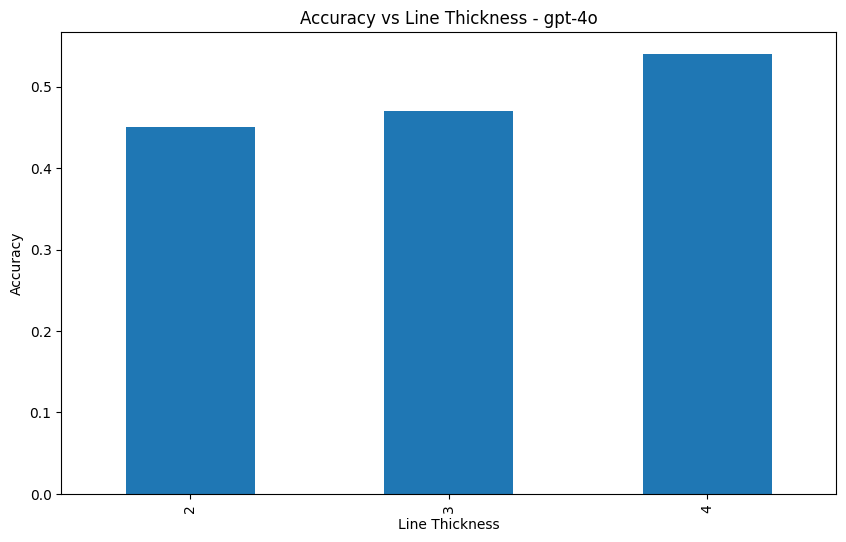

Accuracy by line thickness:
line_thickness
2    0.45
3    0.47
4    0.54
Name: is_correct, dtype: float64




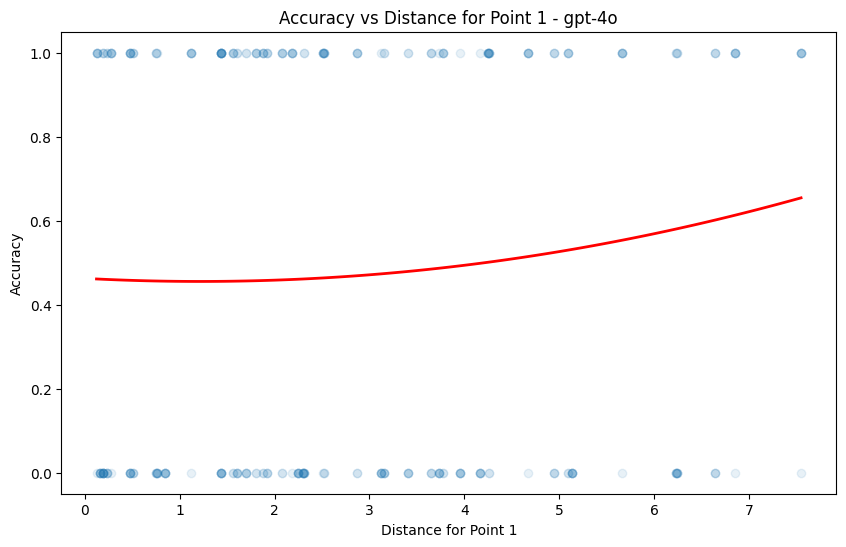

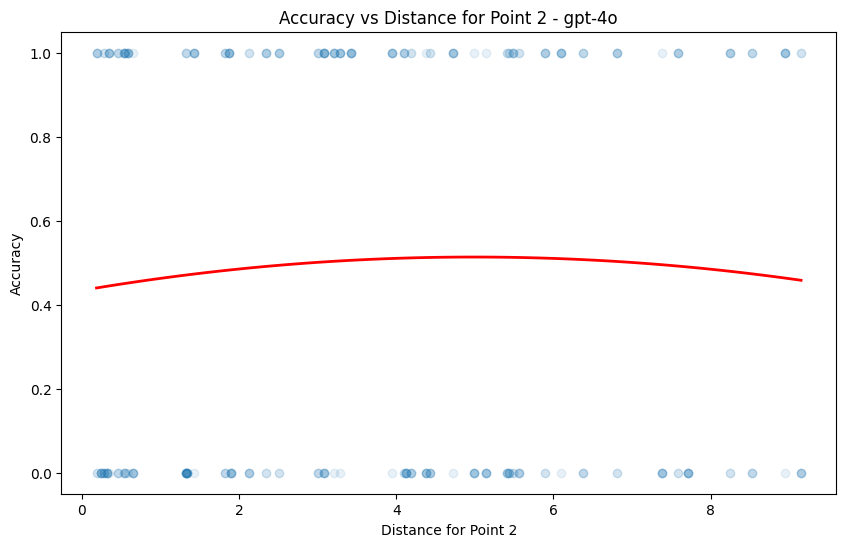

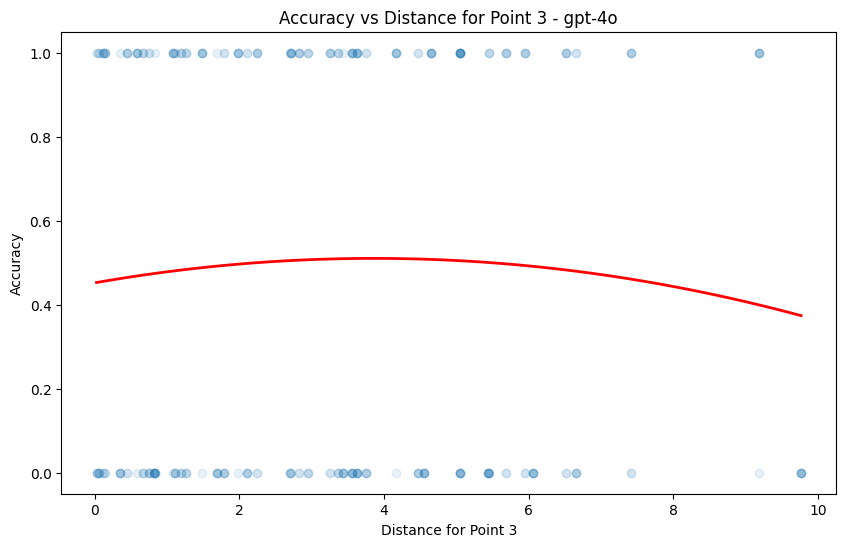

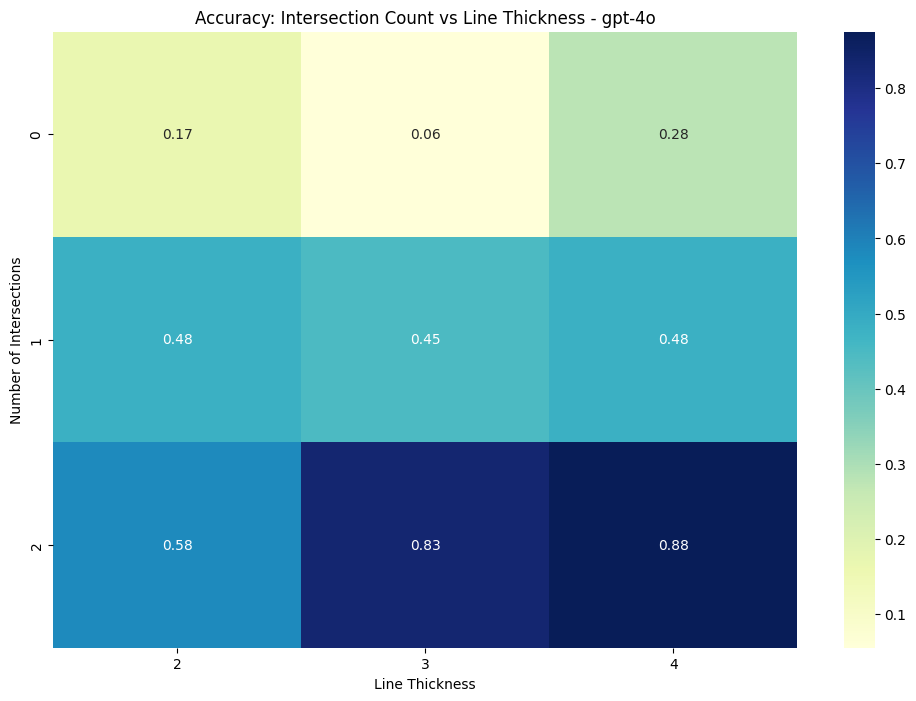

Accuracy by intersection count and line thickness:
line_thickness            2         3         4
num_intersections                              
0                  0.166667  0.055556  0.277778
1                  0.482759  0.448276  0.482759
2                  0.583333  0.833333  0.875000


Average distance between points for correct vs incorrect predictions:
is_correct
False    3.150568
True     3.298779
Name: avg_distance, dtype: float64



Analysis for Gemini-1.5-Pro



/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_72753/626910196.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["avg_distance"] = (


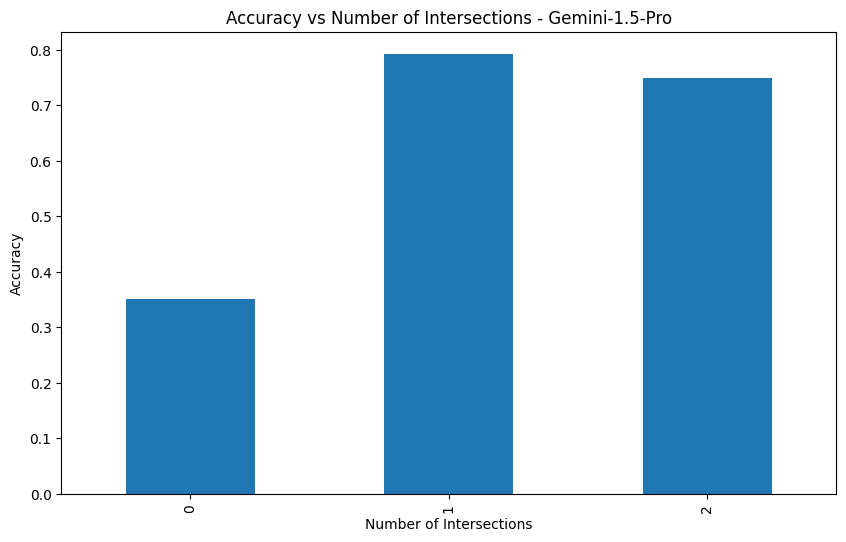

Accuracy by number of intersections:
num_intersections
0    0.351852
1    0.793103
2    0.750000
Name: is_correct, dtype: float64




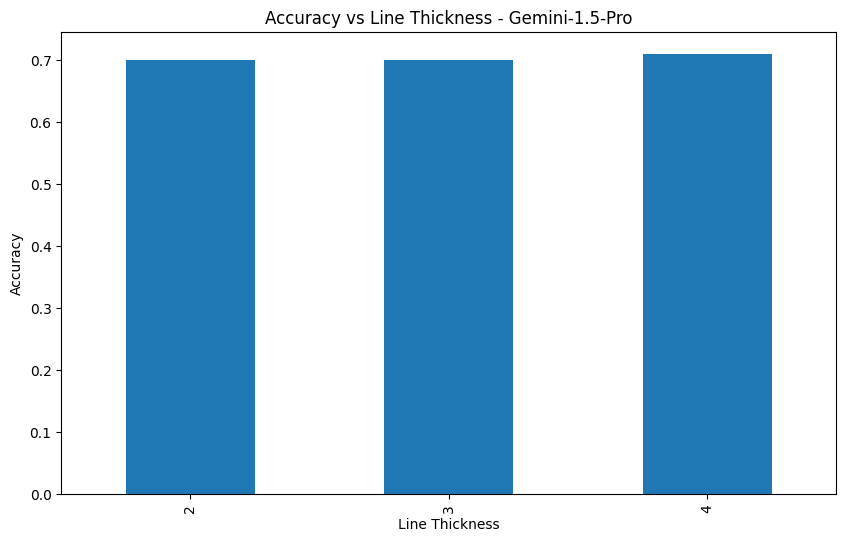

Accuracy by line thickness:
line_thickness
2    0.70
3    0.70
4    0.71
Name: is_correct, dtype: float64




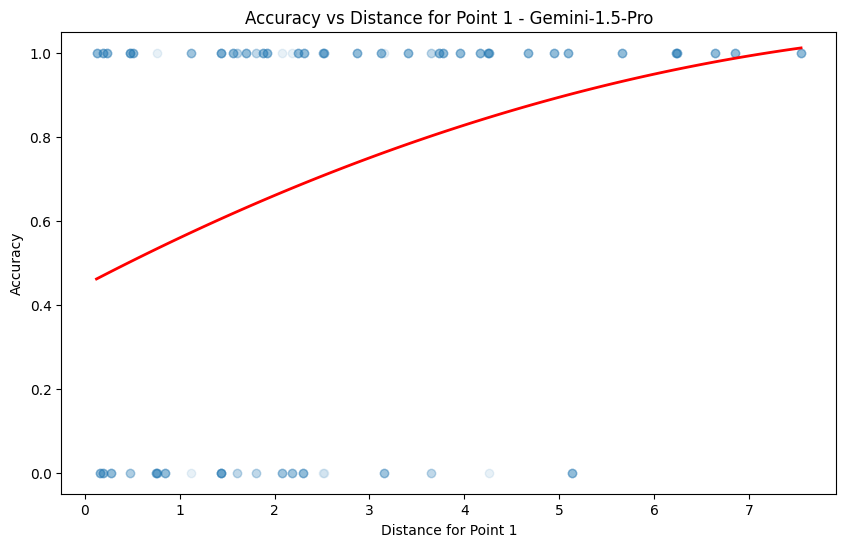

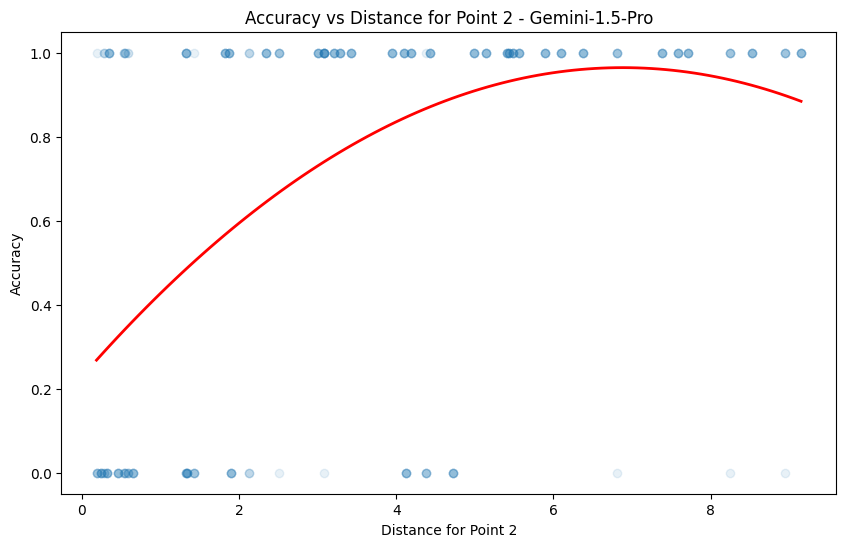

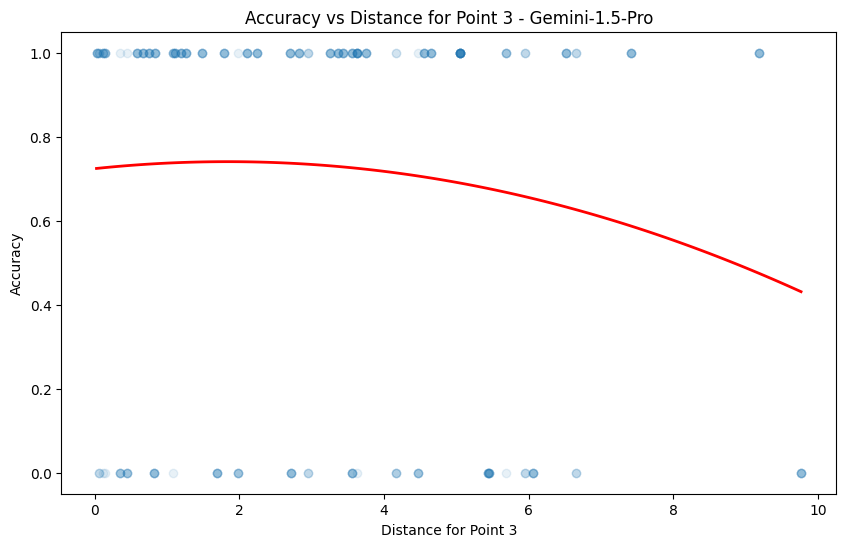

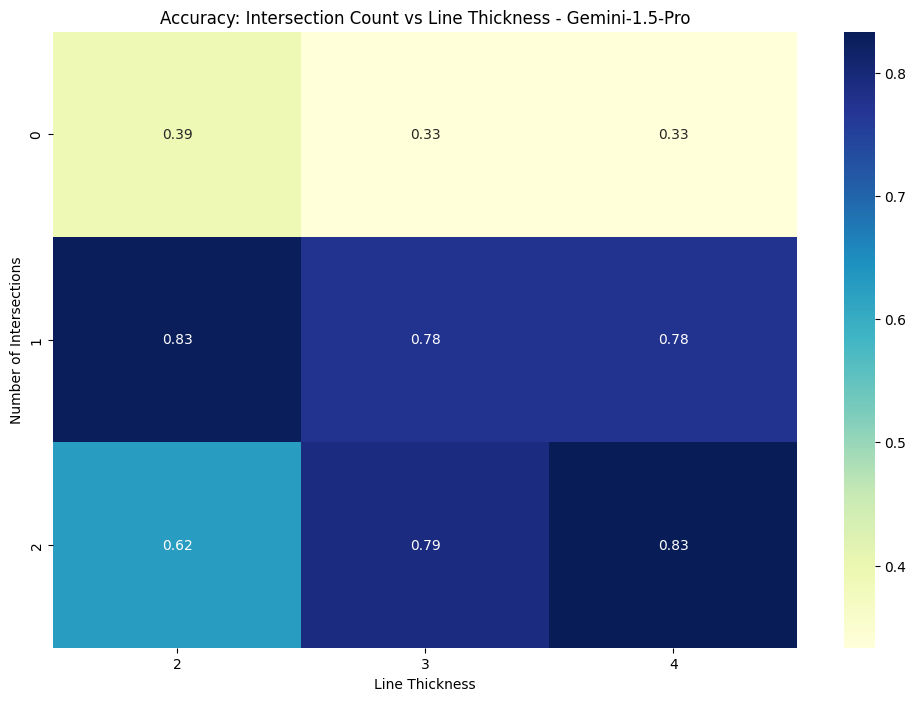

Accuracy by intersection count and line thickness:
line_thickness            2         3         4
num_intersections                              
0                  0.388889  0.333333  0.333333
1                  0.827586  0.775862  0.775862
2                  0.625000  0.791667  0.833333


Average distance between points for correct vs incorrect predictions:
is_correct
False    2.365146
True     3.584413
Name: avg_distance, dtype: float64




/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_72753/626910196.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["avg_distance"] = (


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique models
models = df["Model"].unique()

for model in models:
    model_df = df[df["Model"] == model]

    print(f"\nAnalysis for {model}\n")
    print("=" * 50)

    # 1. Relationship between number of intersections and accuracy
    intersection_accuracy = model_df.groupby("num_intersections")["is_correct"].mean()
    plt.figure(figsize=(10, 6))
    intersection_accuracy.plot(kind="bar")
    plt.title(f"Accuracy vs Number of Intersections - {model}")
    plt.xlabel("Number of Intersections")
    plt.ylabel("Accuracy")
    plt.show()

    print("Accuracy by number of intersections:")
    print(intersection_accuracy)
    print("\n" + "=" * 50 + "\n")

    # 2. Relationship between line thickness and accuracy
    thickness_accuracy = model_df.groupby("line_thickness")["is_correct"].mean()
    plt.figure(figsize=(10, 6))
    thickness_accuracy.plot(kind="bar")
    plt.title(f"Accuracy vs Line Thickness - {model}")
    plt.xlabel("Line Thickness")
    plt.ylabel("Accuracy")
    plt.show()

    print("Accuracy by line thickness:")
    print(thickness_accuracy)
    print("\n" + "=" * 50 + "\n")

    # 3. Relationship between point distances and accuracy
    for i in range(1, 4):
        plt.figure(figsize=(10, 6))
        plt.scatter(model_df[f"distance_point{i}"], model_df["is_correct"], alpha=0.1)

        # Fit a polynomial of degree 2
        z = np.polyfit(model_df[f"distance_point{i}"], model_df["is_correct"], 2)
        p = np.poly1d(z)

        # Plot the fitted polynomial
        x_range = np.linspace(
            model_df[f"distance_point{i}"].min(),
            model_df[f"distance_point{i}"].max(),
            100,
        )
        plt.plot(x_range, p(x_range), "r-", linewidth=2)

        plt.title(f"Accuracy vs Distance for Point {i} - {model}")
        plt.xlabel(f"Distance for Point {i}")
        plt.ylabel("Accuracy")
        plt.ylim(-0.05, 1.05)  # Set y-axis limits
        plt.show()

    # 4. Interaction between number of intersections and line thickness
    interaction_accuracy = (
        model_df.groupby(["num_intersections", "line_thickness"])["is_correct"]
        .mean()
        .unstack()
    )
    plt.figure(figsize=(12, 8))
    sns.heatmap(interaction_accuracy, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"Accuracy: Intersection Count vs Line Thickness - {model}")
    plt.xlabel("Line Thickness")
    plt.ylabel("Number of Intersections")
    plt.show()

    print("Accuracy by intersection count and line thickness:")
    print(interaction_accuracy)
    print("\n" + "=" * 50 + "\n")

    # 5. Average distance between points for correct vs incorrect predictions
    model_df["avg_distance"] = (
        model_df["distance_point1"]
        + model_df["distance_point2"]
        + model_df["distance_point3"]
    ) / 3
    avg_distance_by_correctness = model_df.groupby("is_correct")["avg_distance"].mean()
    print("Average distance between points for correct vs incorrect predictions:")
    print(avg_distance_by_correctness)
    print("\n" + "=" * 50 + "\n")